# Conjunto de ejercicios

### 1. Sea $𝑓(𝑥) = −𝑥^3 − cos (𝑥 )$ y  $𝑝_0 = −1$. Use el método de Newton y de la Secante para encontrar $p_2$. ###

In [183]:
import math
def f(x):
    return -x**3 - math.cos(x)
def df(x):
    return -3*x**2 + math.sin(x)
def newton(p0, tol, max_iter):
    p = p0
    for i in range(max_iter):
        p = p - f(p) / df(p)
        if abs(f(p)) < tol:
            return p, i
    return p, max_iter

In [184]:
p0 = -1
p1 = p0 + 0.1 
tolerancia = 1e-6
max_iteraciones = 1000
p_newton, iter_newton = newton(p0, tolerancia, max_iteraciones)
print("Método de Newton:")
print("p2 =", p_newton)
print("Iteraciones necesarias:", iter_newton)

Método de Newton:
p2 = -0.865474075952977
Iteraciones necesarias: 2


In [187]:
import numpy as np
from scipy.optimize import newton
func = lambda x: -x**3 - np.cos(x)

In [188]:
x0 = -1
p2, iterations = newton(func, x0, full_output=True)
print("Metodo de la secante:")
print(f"Número de iteraciones realizadas: {iterations.iterations}")
print(f"El valor de p2 es: {p2}")

Metodo de la secante:
Número de iteraciones realizadas: 6
El valor de p2 es: -0.8654740331016144


### ¿Se podría usar $p_0 = 0$? ###

Con el punto $p_0=0$ no se podria realizar el metodo de newton ya que al aplicar la formula se tendria una division por cero lo cual no se puede hacer.  
Cambiando el punto inicial en el codigo podemos ver que nos arroja un error.

In [193]:
import math
def f(x):
    return -x**3 - math.cos(x)
def df(x):
    return -3*x**2 + math.sin(x)
def newton(p0, tol, max_iter):
    p = p0
    for i in range(max_iter):
        p = p - f(p) / df(p)
        if abs(f(p)) < tol:
            return p, i
    return p, max_iter
p0 = 0
p1 = p0 + 0.1 
tolerancia = 1e-6
max_iteraciones = 1000
p_newton, iter_newton = newton(p0, tolerancia, max_iteraciones)
print("Método de Newton:")
print("p2 =", p_newton)
print("Iteraciones necesarias:", iter_newton)

ZeroDivisionError: float division by zero

Con el metodo de la secante si se puede hacer ya que esta por decirlo asi no necesita de la derivada de la funcion.   
Cambiando el valor inicial de la funcion se observa e resultado.

In [ ]:
x0 = 0
p2, iterations = newton(func, x0, full_output=True)
print("Metodo de la secante:")
print(f"Número de iteraciones realizadas: {iterations.iterations}")
print(f"El valor de p2 es: {p2}")

### 2. Encuentre soluciones precisas dentro de $10^-4$ para los siguientes problemas. ###

**a. $x^3 -2x^2 -5=0, [1,4]$**

In [198]:
import numpy as np
from scipy.optimize import newton
func = lambda x: x**3 - 2*x**2 - 5
x0 = 1
x1=4
p2, iterations = newton(func, x0=x0, full_output=True,x1=4)
print("Metodo de la secante:")
print(f"Número de iteraciones realizadas: {iterations.iterations}")
print(f"El valor  es: {p2}")

Metodo de la secante:
Número de iteraciones realizadas: 11
El valor  es: 2.6906474480286136


**b. $x^3 +3x^2 -1=0, [-3,-2]$**

In [200]:
import numpy as np
from scipy.optimize import newton
func = lambda x: x**3 + 3*x**2 - 1
x0 = -3
x1=-2
p2, iterations = newton(func, x0=x0, full_output=True,x1=x1)
print("Metodo de la secante:")
print(f"Número de iteraciones realizadas: {iterations.iterations}")
print(f"El valor  es: {p2}")

Metodo de la secante:
Número de iteraciones realizadas: 8
El valor  es: -2.879385241571817


**c. $x-cos(x)=0 , [0,\pi/2 ]$**

In [204]:
import numpy as np
from scipy.optimize import newton
func = lambda x: x-math.cos(x)
x0 = 0
x1=math.pi/2
p2, iterations = newton(func, x0=x0, full_output=True,x1=x1)
print("Metodo de la secante:")
print(f"Número de iteraciones realizadas: {iterations.iterations}")
print(f"El valor  es: {p2}")

Metodo de la secante:
Número de iteraciones realizadas: 6
El valor  es: 0.7390851332151607


**d. $x-0.8-0.2sen(x)=0, [0,\pi/2]$**

In [206]:
import numpy as np
from scipy.optimize import newton
func = lambda x: x-0.8-0.2*math.sin(x)
x0 = 0
x1=math.pi/2
p2, iterations = newton(func, x0=x0, full_output=True,x1=x1)
print("Metodo de la secante:")
print(f"Número de iteraciones realizadas: {iterations.iterations}")
print(f"El valor  es: {p2}")

Metodo de la secante:
Número de iteraciones realizadas: 5
El valor  es: 0.964333887695228


### 3. Use los 2 métodos en esta sección para encontrar las soluciones dentro de $10^-5$ para los siguientes problemas ###

**a. $3x-e^x =0$ para $1 <=x<=2$**

In [211]:
import numpy as np
from scipy.optimize import newton

In [212]:
func = lambda x: 3 * x - np.exp(x)
x0 = 1
x1=2
p2, iterations = newton(func, x0=x0, full_output=True,x1=x1)
print("Metodo de la secante:")
print(f"Número de iteraciones realizadas: {iterations.iterations}")
print(f"El valor  es: {p2}")

Metodo de la secante:
Número de iteraciones realizadas: 10
El valor  es: 1.5121345516578424


In [213]:
import sympy as sp
x = sp.symbols('x')
expr = 3 * x - sp.exp(x)
derivative = sp.diff(expr, x)
f = sp.lambdify(x, expr, 'numpy')
df = sp.lambdify(x, derivative, 'numpy')

def newton(p0, tol, max_iter):
    p = p0
    for i in range(max_iter):
        p = p - f(p) / df(p)
        if abs(f(p)) < tol:
            return p, i
    return p, max_iter
p0 = 1.5 #punto medio del intervalo
tolerancia = 1e-5
max_iteraciones = 100

p_newton, iter_newton = newton(p0, tolerancia, max_iteraciones)

print("Metodo de Newton:")
print("p =", p_newton)
print("Iteraciones necesarias:", iter_newton)

Metodo de Newton:
p = 1.512134625427124
Iteraciones necesarias: 1


**b. $2x+3cos(x)-e^x$ para $1<=x<=2$**

In [218]:
func = lambda x:2*x+3*np.cos(x)-np.exp(x)
x0 = 1
x1=2
p2, iterations = newton(func, x0=x0, full_output=True,x1=x1)
print("Metodo de la secante:")
print(f"Número de iteraciones realizadas: {iterations.iterations}")
print(f"El valor  es: {p2}")

TypeError: newton() got an unexpected keyword argument 'x0'

In [ ]:
import sympy as sp
x = sp.symbols('x')
expr = 2*x+3*sp.cos(x)-sp.exp(x)
derivative = sp.diff(expr, x)
f = sp.lambdify(x, expr, 'numpy')
df = sp.lambdify(x, derivative, 'numpy')

def newton(p0, tol, max_iter):
    p = p0
    for i in range(max_iter):
        p = p - f(p) / df(p)
        if abs(f(p)) < tol:
            return p, i
    return p, max_iter
p0 = 1.5 #punto medio del intervalo
tolerancia = 1e-5
max_iteraciones = 100

p_newton, iter_newton = newton(p0, tolerancia, max_iteraciones)

print("Metodo de Newton:")
print("p =", p_newton)
print("Iteraciones necesarias:", iter_newton)

### 4. El polinomio de cuarto grado $f(x)=230x^4+18x^3+9x^2-221x-9$   tiene dos ceros reales, uno en $[−1,0]$ y el otro en $[0,]$. Intente aproximar estos ceros dentro de $10^-6$ con ###

**a. El método de la secante (use los extremos como las estimaciones iniciales)**

In [220]:
import numpy as np
from scipy.optimize import newton
func = lambda x: 230*x**4+18*x**3+9*x**2-221*x-9
x0 = -1
x1=0
p, iterations = newton(func, x0=x0, full_output=True,x1=x1)
print("Intervalo [-1,0]:")
print(f"Número de iteraciones realizadas: {iterations.iterations}")
print(f"El valor  es: {p}")
x0=0
p, iterations = newton(func, x0=x0, full_output=True)
print("Intervalo [0,]:")
print(f"Número de iteraciones realizadas: {iterations.iterations}")
print(f"El valor  es: {p}")

Intervalo [-1,0]:
Número de iteraciones realizadas: 5
El valor  es: -0.04065928831575775
Intervalo [0,]:
Número de iteraciones realizadas: 4
El valor  es: -0.04065928831575887


**b. El método de Newton (use el punto medio como estimación inicial)**

In [223]:
import sympy as sp
x = sp.symbols('x')
expr = 230*x**4 + 18*x**3 + 9*x**2 - 221*x - 9
derivative = sp.diff(expr, x)
f = sp.lambdify(x, expr, 'numpy')
df = sp.lambdify(x, derivative, 'numpy')

def newton(p0, tol, max_iter):
    p = p0
    for i in range(max_iter):
        p = p - f(p) / df(p)
        if abs(f(p)) < tol:
            return p, i
    return p, max_iter

p0 = -0.5  # Punto medio del intervalo 
tolerancia = 1e-6
max_iteraciones = 10

p_newton, iter_newton = newton(p0, tolerancia, max_iteraciones)

print("Intervalo [-1,0]:")
print("p =", p_newton)
print("Iteraciones necesarias:", iter_newton)
p0 = 0.5  # Punto medio del intervalo

p_newton, iter_newton = newton(p0, tolerancia, max_iteraciones)
print("Intervalo [0,]:")
print("p =", p_newton)
print("Iteraciones necesarias:", iter_newton)

Intervalo [-1,0]:
p = -0.04065928831575899
Iteraciones necesarias: 3
Intervalo [0,]:
p = -0.04065928834533494
Iteraciones necesarias: 4


### 5.La función $𝑓(𝑥) = tan 𝜋 𝑥 − 6$ tiene cero en $(1⁄𝜋)arcotangente 6 ≈ 0.447431543$. Sea $p_0 = 0 y 𝑝_1 = 0.48$ y use 10 iteraciones en cada uno de los siguientes métodos para aproximar esta raíz. ¿Cuál método es más eficaz y por qué? ###

**a. método de bisección**

In [227]:
import numpy as np
def f(x):
    return np.tan(np.pi * x) - 6
def bisection(a, b, tol, max_iter):
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) y f(b) deben tener signos opuestos")
    
    for i in range(max_iter):
        c = (a + b) / 2
        if f(c) == 0 or (b - a) / 2 < tol:
            return c, i
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return c, max_iter
a = 0
b = 0.48
tolerancia = 1e-6
max_iteraciones = 10
p_bisection, iter_bisection = bisection(a, b, tolerancia, max_iteraciones)
print("Número de iteraciones realizadas:", iter_bisection)
print("El valor aproximado de la raíz es:", p_bisection)


Número de iteraciones realizadas: 10
El valor aproximado de la raíz es: 0.44765625


**b. método de Newton**

In [230]:
import numpy as np
import sympy as sp

# Definir la variable y la función
x = sp.symbols('x')
expr = sp.tan(np.pi * x) - 6
derivative = sp.diff(expr, x)

# Convertir las expresiones a funciones que pueden ser evaluadas numéricamente
f = sp.lambdify(x, expr, 'numpy')
df = sp.lambdify(x, derivative, 'numpy')

def newton(p0, max_iter):
    p = p0
    for i in range(max_iter):
        p = p - f(p) / df(p)
    return p, max_iter

# Parámetros iniciales
p0 = 0.48  # Punto inicial
max_iteraciones = 10

# Ejecutar el método de Newton
p_newton, iter_newton = newton(p0, max_iteraciones)

print("Método de Newton:")
print("Número de iteraciones realizadas:", iter_newton)
print("El valor aproximado de la raíz es:", p_newton)


Método de Newton:
Número de iteraciones realizadas: 10
El valor aproximado de la raíz es: 0.447431543288747


**c.método de la secante**

In [233]:
import numpy as np

# Definir la función y su derivada
def f(x):
    return np.tan(np.pi * x) - 6

def f_prime(x):
    return np.pi * (1 / np.cos(np.pi * x))**2

# Parámetros iniciales para cada método
a, b = 0, 0.48  # Para la bisección
p0_newton = 0.48  # Para Newton
p0_secant = 0
p1_secant = 0.48  # Para la secante

# Bisección
def bisection(a, b, n):
    for i in range(n):
        c = (a + b) / 2
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return c

# Newton
def newton(p0, n):
    for i in range(n):
        p0 = p0 - f(p0) / f_prime(p0)
    return p0

# Secante
def secant(p0, p1, n):
    for i in range(n):
        p_temp = p1 - f(p1) * (p1 - p0) / (f(p1) - f(p0))
        p0 = p1
        p1 = p_temp
    return p1

# Realizar las iteraciones
n_iterations = 10
root_bisection = bisection(a, b, n_iterations)
root_newton = newton(p0_newton, n_iterations)
root_secant = secant(p0_secant, p1_secant, n_iterations)

root_bisection, root_newton, root_secant


(0.44765625, 0.44743154328874657, -2989.9400375314453)

In [235]:
import numpy as np
func = lambda x: np.tan(np.pi * x) - 6
x0 = 0
x1 = 0.48
n_iterations = 10

for _ in range(n_iterations):
    f_x0 = func(x0)
    f_x1 = func(x1)
    if f_x1 - f_x0 == 0:
        break  # Evitar división por cero
    x_temp = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
    x0 = x1
    x1 = x_temp
p = x1
print(f"Número de iteraciones realizadas: {n_iterations}")
print(f"El valor aproximado de la raíz es: {p}")


Número de iteraciones realizadas: 10
El valor aproximado de la raíz es: -2989.9400375314453


### 6. La función descrita por $𝑓(x) = ln(x^2 + 1) − e^(0.4x) cos(\pi x)$ tiene un número infinito de ceros ###

**a.Determine, dentro de $10^-6$,el único cero negativo**

In [239]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
x = sp.symbols('x')
expr = sp.ln(x**2 + 1) - sp.exp(0.4 * x) * sp.cos(sp.pi * x)
f = sp.lambdify(x, expr, 'numpy')
df = sp.lambdify(x, sp.diff(expr, x), 'numpy')
def newton(p0, tol, max_iter):
    p = p0
    for i in range(max_iter):
        p = p - f(p) / df(p)
        if abs(f(p)) < tol:
            return p, i
    return p, max_iter
p0_neg =-0.1  # Punto inicial negativo
tolerancia = 1e-6
max_iteraciones = 100

p_neg, iter_neg = newton(p0_neg, tolerancia, max_iteraciones)

print("Único cero negativo (dentro de 10^-6):")
print(f"p = {p_neg}, Iteraciones necesarias = {iter_neg}")

Único cero negativo (dentro de 10^-6):
p = -0.43414310019246605, Iteraciones necesarias = 3


**b.Determine, dentro de $10^-6$, los cuatro ceros positivos más pequeños.**

In [242]:
p0s_pos = [0.5, 1.5, 2.5, 3.5] 
ceros_positivos = []

for p0 in p0s_pos:
    p_pos, iter_pos = newton(p0, tolerancia, max_iteraciones)
    ceros_positivos.append((p_pos, iter_pos))

print("Cuatro ceros positivos más pequeños (dentro de 10^-6):")
for i, (p, iter_pos) in enumerate(ceros_positivos, start=1):
    print(f"Para p0={p0s_pos[i-1]},Cero {i}: p = {p}, Iteraciones necesarias = {iter_pos}")

Cuatro ceros positivos más pequeños (dentro de 10^-6):
Para p0=0.5,Cero 1: p = 0.45065674789059323, Iteraciones necesarias = 2
Para p0=1.5,Cero 2: p = 1.7447380533683496, Iteraciones necesarias = 2
Para p0=2.5,Cero 3: p = 2.238319796456584, Iteraciones necesarias = 3
Para p0=3.5,Cero 4: p = 3.709041201357361, Iteraciones necesarias = 2


**c. Determine una aproximación inicial razonable para encontrar el enésimo cero positivo más pequeño de 𝑓.**

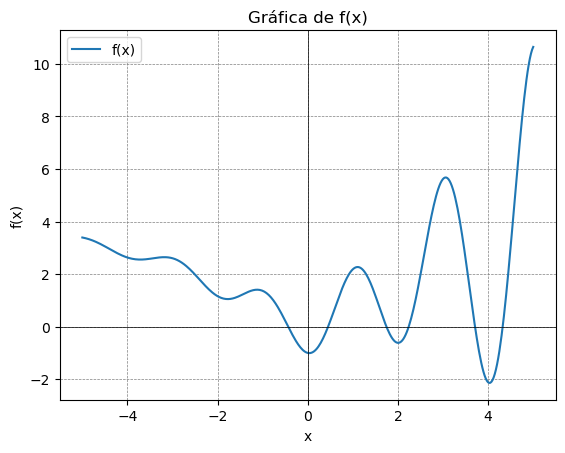

In [245]:
# Graficar la función para ver la distribución de los ceros
x_vals = np.linspace(-5, 5, 400)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals, label='f(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de f(x)')
plt.legend()
plt.show()


**Respuesta:**  
Observando la grafica podemos concluir que la aproximación inicial $n− 0.5$ es bastante razonable.

**d. Use la parte c) para determinar, dentro de $10^-6$, el vigesimoquinto cero positivo más pequeño de 𝑓.**

In [249]:
n = 25
p0_n = n - 0.5 
p_n, iter_n = newton(p0_n, tolerancia, max_iteraciones)
print(f"Vigesimoquinto cero positivo más pequeño (dentro de 10^-6):")
print(f"p = {p_n}, Iteraciones necesarias = {iter_n}")

Vigesimoquinto cero positivo más pequeño (dentro de 10^-6):
p = 24.499887047445956, Iteraciones necesarias = 1


### 7. La función $𝑓(𝑥) = 𝑥^(1/3)$ tiene raíz en 𝑥 = 0.Usando el punto de inicio de 𝑥 = 1 y $𝑝_0 = 5$, $𝑝_1 = 0.5$ para el método de secante, compare los resultados de los métodos de la secante y de Newton.

El método de la secante no converge después de 100 iteraciones.
El método de Newton no converge después de 100 iteraciones.
Resultado del método de la secante: None
Resultado del método de Newton: None


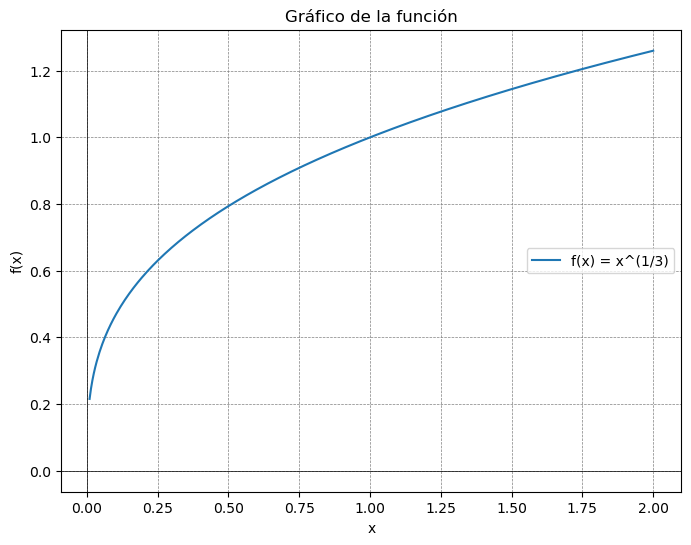

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**(1/3)

def df(x):
    return (1/3)*x**(-2/3)

def secant_method(p0, p1, tol, max_iter):
    i = 2
    q0 = f(p0)
    q1 = f(p1)
    while i <= max_iter:
        p = p1 - q1 * (p1 - p0) / (q1 - q0)
        if abs(p - p1) < tol:
            return p
        i += 1
        p0 = p1
        q0 = q1
        p1 = p
        q1 = f(p)
    print("El método de la secante no converge después de", max_iter, "iteraciones.")
    return None

def newton_method(p0, tol, max_iter):
    i = 1
    while i <= max_iter:
        p = p0 - f(p0) / df(p0)
        if abs(p - p0) < tol:
            return p
        i += 1
        p0 = p
    print("El método de Newton no converge después de", max_iter, "iteraciones.")
    return None

# Nuevos parámetros
p0_secant = 1
p1_secant = 5
p0_newton = 1.0
tol = 1e-5
max_iter = 100

x_values = np.linspace(0.01, 2, 400)
y_values = f(x_values)

root_secant = secant_method(p0_secant, p1_secant, tol, max_iter)
root_newton = newton_method(p0_newton, tol, max_iter)

print("Resultado del método de la secante:", root_secant)
print("Resultado del método de Newton:", root_newton)
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='f(x) = x^(1/3)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfico de la función')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()
